<a href="https://colab.research.google.com/github/evangelineolivia/Assignment2_MachineLearning/blob/main/AML_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Final Project/microsoft-malware-prediction/train.csv"

In [3]:
dtypes = {
    "Census_PrimaryDiskTotalCapacity": pl.Float64,
    "Census_InternalBatteryNumberOfCharges": pl.Float64
}
data = pl.read_csv(path, schema_overrides=dtypes)

In [8]:
data

MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,…,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,str,str,str,i64,i64,str,i64,i64,str,i64,i64,str,str,i64,…,i64,str,f64,i64,i64,str,str,f64,str,str,str,i64,i64,str,str,str,i64,i64,str,i64,str,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""0000028988387b115f69f31a3bf04f…","""win8defender""","""1.1.15100.1""","""4.18.1807.18075""","""1.273.1735.0""",0,7,0,null,53447,1,1,1,29,128035,18,35,171,"""windows10""","""x64""","""10.0.0.0""",17134,256,"""rs4""","""17134.1.amd64fre.rs4_release.1…","""Pro""",1,0,null,0,137,null,1,1,"""Desktop""","""Windows.Desktop""",2668,…,4096,"""Desktop""",18.9,1440,900,"""Desktop""",null,4.2950e9,"""10.0.17134.165""","""amd64""","""rs4_release""",17134,165,"""Professional""","""PROFESSIONAL""","""UUPUpgrade""",26,119,"""UNKNOWN""",0,"""IS_GENUINE""","""Retail""",null,0,"""Retail""",null,628,36144,0,null,0,0,0,0,0,10,0
"""000007535c3f730efa9ea0b7ef1bd6…","""win8defender""","""1.1.14600.4""","""4.13.17134.1""","""1.263.48.0""",0,7,0,null,53447,1,1,1,93,1482,18,119,64,"""windows10""","""x64""","""10.0.0.0""",17134,256,"""rs4""","""17134.1.amd64fre.rs4_release.1…","""Pro""",1,0,null,0,137,null,1,1,"""Notebook""","""Windows.Desktop""",2668,…,4096,"""Notebook""",13.9,1366,768,"""Mobile""",null,1.0,"""10.0.17134.1""","""amd64""","""rs4_release""",17134,1,"""Professional""","""PROFESSIONAL""","""IBSClean""",8,31,"""UNKNOWN""",0,"""OFFLINE""","""Retail""",null,0,"""NOT_SET""",null,628,57858,0,null,0,0,0,0,0,8,0
"""000007905a28d863f6d0d597892cd6…","""win8defender""","""1.1.15100.1""","""4.18.1807.18075""","""1.273.1341.0""",0,7,0,null,53447,1,1,1,86,153579,18,64,49,"""windows10""","""x64""","""10.0.0.0""",17134,768,"""rs4""","""17134.1.amd64fre.rs4_release.1…","""Home""",1,0,null,0,137,"""RequireAdmin""",1,1,"""Desktop""","""Windows.Desktop""",4909,…,4096,"""Desktop""",21.5,1920,1080,"""Desktop""",null,4.2950e9,"""10.0.17134.165""","""amd64""","""rs4_release""",17134,165,"""Core""","""CORE""","""UUPUpgrade""",7,30,"""FullAuto""",0,"""IS_GENUINE""","""OEM:NONSLP""",null,0,"""Retail""",null,142,52682,0,null,0,0,0,0,0,3,0
"""00000b11598a75ea8ba1beea845914…","""win8defender""","""1.1.15100.1""","""4.18.1807.18075""","""1.273.1527.0""",0,7,0,null,53447,1,1,1,88,20710,null,117,115,"""windows10""","""x64""","""10.0.0.0""",17134,256,"""rs4""","""17134.1.amd64fre.rs4_release.1…","""Pro""",1,0,null,0,137,"""ExistsNotSet""",1,1,"""Desktop""","""Wi

In [4]:
df_pos = data.filter(pl.col("HasDetections") == 1)
df_neg = data.filter(pl.col("HasDetections") == 0)

n_neg = len(df_neg)
n_pos = int(n_neg / 3)

df_pos_down = df_pos.sample(n=n_pos, with_replacement=False, seed=42)
final_df = pl.concat([df_neg, df_pos_down])
final_df = final_df.sample(n=final_df.height, with_replacement=False, seed=42) #Shuffle

class_dist = (
    final_df
    .group_by("HasDetections")
    .len(name="count")
    .with_columns(
        (pl.col("count") / pl.col("count").sum()).alias("ratio")
    )
)

print(class_dist)

final_df

shape: (2, 3)
┌───────────────┬─────────┬───────┐
│ HasDetections ┆ count   ┆ ratio │
│ ---           ┆ ---     ┆ ---   │
│ i64           ┆ u32     ┆ f64   │
╞═══════════════╪═════════╪═══════╡
│ 1             ┆ 1487530 ┆ 0.25  │
│ 0             ┆ 4462591 ┆ 0.75  │
└───────────────┴─────────┴───────┘


MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,…,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,str,str,str,i64,i64,str,i64,i64,str,i64,i64,str,str,i64,…,i64,str,f64,i64,i64,str,str,f64,str,str,str,i64,i64,str,str,str,i64,i64,str,i64,str,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""0000028988387b115f69f31a3bf04f…","""win8defender""","""1.1.15100.1""","""4.18.1807.18075""","""1.273.1735.0""",0,7,0,null,53447,1,1,1,29,128035,18,35,171,"""windows10""","""x64""","""10.0.0.0""",17134,256,"""rs4""","""17134.1.amd64fre.rs4_release.1…","""Pro""",1,0,null,0,137,null,1,1,"""Desktop""","""Windows.Desktop""",2668,…,4096,"""Desktop""",18.9,1440,900,"""Desktop""",null,4.2950e9,"""10.0.17134.165""","""amd64""","""rs4_release""",17134,165,"""Professional""","""PROFESSIONAL""","""UUPUpgrade""",26,119,"""UNKNOWN""",0,"""IS_GENUINE""","""Retail""",null,0,"""Retail""",null,628,36144,0,null,0,0,0,0,0,10,0
"""000007535c3f730efa9ea0b7ef1bd6…","""win8defender""","""1.1.14600.4""","""4.13.17134.1""","""1.263.48.0""",0,7,0,null,53447,1,1,1,93,1482,18,119,64,"""windows10""","""x64""","""10.0.0.0""",17134,256,"""rs4""","""17134.1.amd64fre.rs4_release.1…","""Pro""",1,0,null,0,137,null,1,1,"""Notebook""","""Windows.Desktop""",2668,…,4096,"""Notebook""",13.9,1366,768,"""Mobile""",null,1.0,"""10.0.17134.1""","""amd64""","""rs4_release""",17134,1,"""Professional""","""PROFESSIONAL""","""IBSClean""",8,31,"""UNKNOWN""",0,"""OFFLINE""","""Retail""",null,0,"""NOT_SET""",null,628,57858,0,null,0,0,0,0,0,8,0
"""000007905a28d863f6d0d597892cd6…","""win8defender""","""1.1.15100.1""","""4.18.1807.18075""","""1.273.1341.0""",0,7,0,null,53447,1,1,1,86,153579,18,64,49,"""windows10""","""x64""","""10.0.0.0""",17134,768,"""rs4""","""17134.1.amd64fre.rs4_release.1…","""Home""",1,0,null,0,137,"""RequireAdmin""",1,1,"""Desktop""","""Windows.Desktop""",4909,…,4096,"""Desktop""",21.5,1920,1080,"""Desktop""",null,4.2950e9,"""10.0.17134.165""","""amd64""","""rs4_release""",17134,165,"""Core""","""CORE""","""UUPUpgrade""",7,30,"""FullAuto""",0,"""IS_GENUINE""","""OEM:NONSLP""",null,0,"""Retail""",null,142,52682,0,null,0,0,0,0,0,3,0
"""000019515bc8f95851aff6de873405…","""win8defender""","""1.1.15100.1""","""4.18.1807.18075""","""1.273.1393.0""",0,7,0,null,53447,1,1,1,97,150323,27,126,124,"""windows10""","""x64""","""10.0.0.0""",14393,768,"""rs1""","""14393.0.amd64fre.rs1_release.1…","""Home""",1,0,null,0,94,"""RequireAdmin""",1,1,"""Notebook""","""Wi

In [5]:
final_df=final_df.to_pandas()

# Exploratory Data Analysis - Categorical Variables

This notebook will serve as an initial exploratory data analysis for the following variables :
* Census_OSWUAutoUpdateOptionsName
* Census_PowerPlatformRoleName
* Census_PrimaryDiskTypeName
* Census_ProcessorClass
* EngineVersion
* OsBuild
* OsBuildLab
* OsPlatformSubRelease
* OsSuite
* OsVer
* Platform
* Processor
* ProductName
* RtpStateBitfield
* SkuEdition
* SmartScreen
* UacLuaenable

In [11]:
cat = ['Census_OSWUAutoUpdateOptionsName',
'Census_PowerPlatformRoleName',
'Census_PrimaryDiskTypeName',
'Census_ProcessorClass',
'EngineVersion',
'OsBuild',
'OsBuildLab',
'OsPlatformSubRelease',
'OsSuite',
'OsVer',
'Platform',
'Processor',
'ProductName',
'RtpStateBitfield',
'SkuEdition',
'SmartScreen',
'UacLuaenable']
for i in cat:
  print(i,final_df[i].nunique())

Census_OSWUAutoUpdateOptionsName 6
Census_PowerPlatformRoleName 10
Census_PrimaryDiskTypeName 4
Census_ProcessorClass 3
EngineVersion 68
OsBuild 74
OsBuildLab 641
OsPlatformSubRelease 9
OsSuite 11
OsVer 48
Platform 4
Processor 3
ProductName 6
RtpStateBitfield 7
SkuEdition 8
SmartScreen 19
UacLuaenable 9


In [18]:
for i in cat:
  print(i,final_df[i].dtype)

Census_OSWUAutoUpdateOptionsName object
Census_PowerPlatformRoleName object
Census_PrimaryDiskTypeName object
Census_ProcessorClass object
EngineVersion object
OsBuild int64
OsBuildLab object
OsPlatformSubRelease object
OsSuite int64
OsVer object
Platform object
Processor object
ProductName object
RtpStateBitfield float64
SkuEdition object
SmartScreen object
UacLuaenable float64


###  Census_OSWUAutoUpdateOptionsName

Description : \\
Friendly name of the WindowsUpdate auto-update settings on the machine.

###### Distribution

In [ ]:
final_df['Census_OSWUAutoUpdateOptionsName'].value_counts()

,count
Census_OSWUAutoUpdateOptionsName,
FullAuto,2594562
UNKNOWN,1685141
Notify,1390211
AutoInstallAndRebootAtMaintenanceTime,250807
Off,18371
DownloadNotify,11029


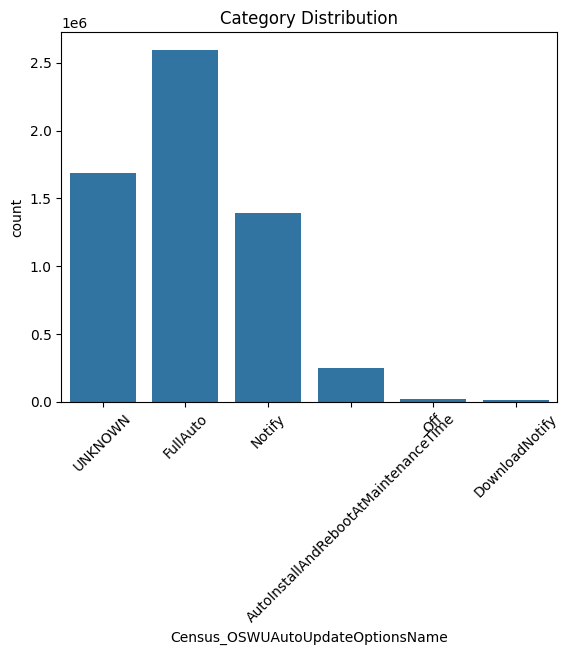

In [ ]:
sns.countplot(data=final_df, x='Census_OSWUAutoUpdateOptionsName')
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['Census_OSWUAutoUpdateOptionsName']].isnull().sum())

missing_ratio = final_df['Census_OSWUAutoUpdateOptionsName'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

Census_OSWUAutoUpdateOptionsName    0
dtype: int64
0.0 %


Census_OSWUAutoUpdateOptionsName
FullAuto                                 43.605197
UNKNOWN                                  28.321122
Notify                                   23.364416
AutoInstallAndRebootAtMaintenanceTime     4.215158
Off                                       0.308750
DownloadNotify                            0.185358
Name: proportion, dtype: float64


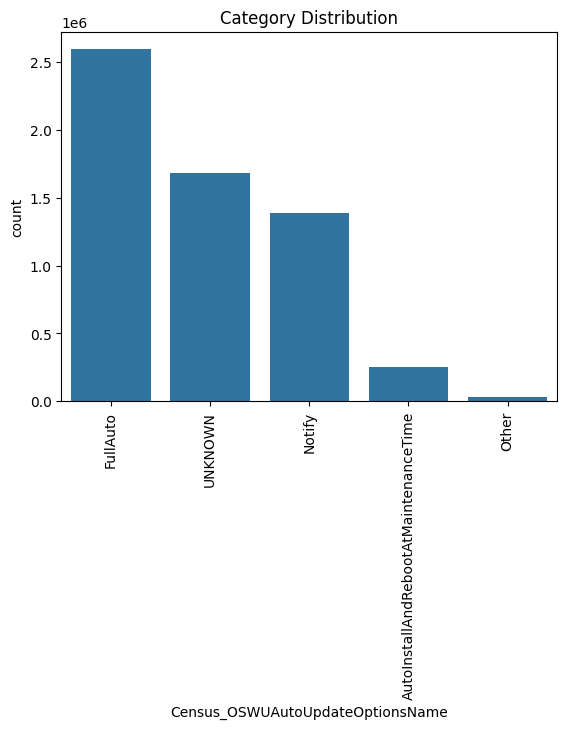

In [10]:
value_counts = (final_df['Census_OSWUAutoUpdateOptionsName'].value_counts(normalize = True)*100)

print(value_counts)

others = value_counts[value_counts < 1].index.tolist()

final_df['Census_OSWUAutoUpdateOptionsName'] = np.where(final_df['Census_OSWUAutoUpdateOptionsName'].isin(others), 'Other',final_df['Census_OSWUAutoUpdateOptionsName'])

order = final_df['Census_OSWUAutoUpdateOptionsName'].value_counts().index
sns.countplot(data=final_df, x='Census_OSWUAutoUpdateOptionsName',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###  Census_PowerPlatformRoleName

Description :  Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device   

###### Distribution

In [ ]:
final_df['Census_PowerPlatformRoleName'].value_counts()

,count
Census_PowerPlatformRoleName,
Mobile,4113221
Desktop,1345102
Slate,371970
Workstation,71635
SOHOServer,25609
UNKNOWN,13928
EnterpriseServer,5206
AppliancePC,3341
PerformanceServer,70


In [14]:
final_df['Census_PowerPlatformRoleName'] = final_df['Census_PowerPlatformRoleName'].replace({
    'UNKNOWN': 'Unknown',
    'Unspecified': 'Unknown'
})

final_df['Census_PowerPlatformRoleName'].value_counts()

,count
Census_PowerPlatformRoleName,
Mobile,4113221
Desktop,1345102
Slate,371970
Workstation,71635
SOHOServer,25609
Unknown,13930
EnterpriseServer,5206
AppliancePC,3341
PerformanceServer,70


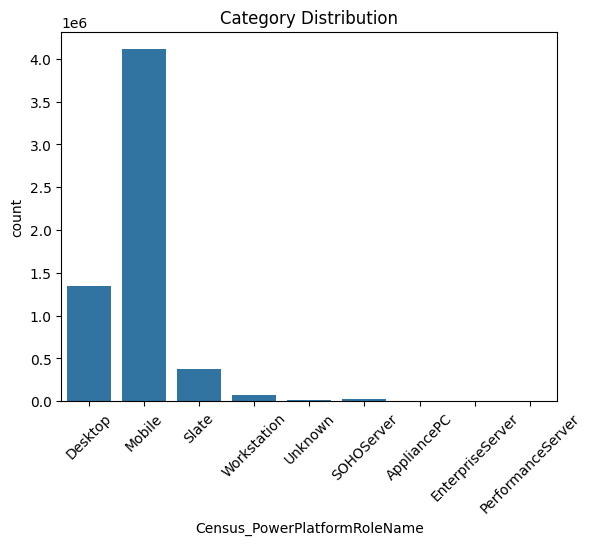

In [ ]:
sns.countplot(data=final_df, x='Census_PowerPlatformRoleName')
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['Census_PowerPlatformRoleName']].isnull().sum())

missing_ratio = final_df['Census_PowerPlatformRoleName'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

Census_PowerPlatformRoleName    37
dtype: int64
0.0006218360937533875 %


Census_PowerPlatformRoleName
Mobile               69.128789
Desktop              22.606437
Slate                 6.251508
Workstation           1.203933
SOHOServer            0.430397
Unknown               0.234114
EnterpriseServer      0.087495
AppliancePC           0.056150
PerformanceServer     0.001176
Name: proportion, dtype: float64


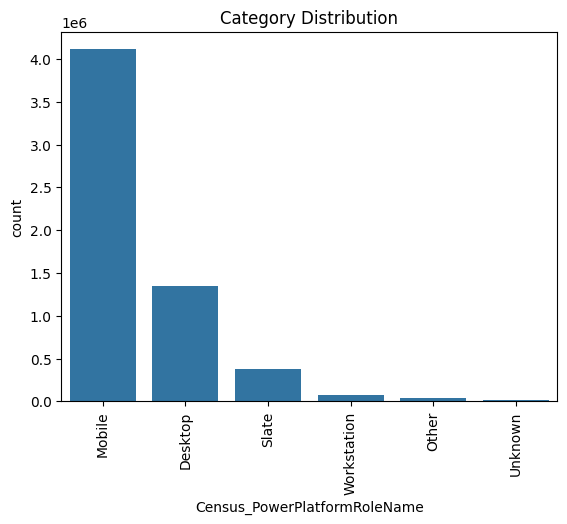

In [15]:
value_counts = (final_df['Census_PowerPlatformRoleName'].value_counts(normalize = True)*100)

print(value_counts)

others = value_counts[(value_counts < 1) & (value_counts.index != 'Unknown')].index.tolist()

final_df['Census_PowerPlatformRoleName']= final_df['Census_PowerPlatformRoleName'].fillna('Unknown')
final_df['Census_PowerPlatformRoleName'] = np.where(final_df['Census_PowerPlatformRoleName'].isin(others), 'Other',final_df['Census_PowerPlatformRoleName'])

order = final_df['Census_PowerPlatformRoleName'].value_counts().index
sns.countplot(data=final_df, x='Census_PowerPlatformRoleName',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###  Census_PrimaryDiskTypeName

Description :  Friendly name of Primary Disk Type   HDD or SSD  

###### Distribution

In [ ]:
final_df['Census_PrimaryDiskTypeName'].value_counts()

,count
Census_PrimaryDiskTypeName,
HDD,3846467
SSD,1649698
UNKNOWN,251103
Unspecified,194208


In [ ]:
final_df['Census_PrimaryDiskTypeName'] = final_df['Census_PrimaryDiskTypeName'].replace({
    'UNKNOWN': 'Unknown',
    'Unspecified': 'Unknown'
})

final_df['Census_PrimaryDiskTypeName'].value_counts()

,count
Census_PrimaryDiskTypeName,
HDD,3846467
SSD,1649698
Unknown,445311


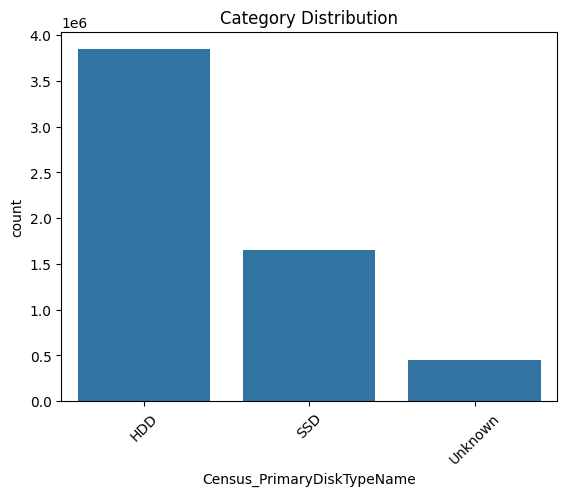

In [ ]:
sns.countplot(data=final_df, x='Census_PrimaryDiskTypeName')
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['Census_PrimaryDiskTypeName']].isnull().sum())

missing_ratio = final_df['Census_PrimaryDiskTypeName'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

Census_PrimaryDiskTypeName    8645
dtype: int64
0.1452911629864334 %


###  Census_ProcessorClass

Description :  A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated   

###### Distribution

Census_ProcessorClass
mid     13194
low      6396
high     3675
Name: count, dtype: int64


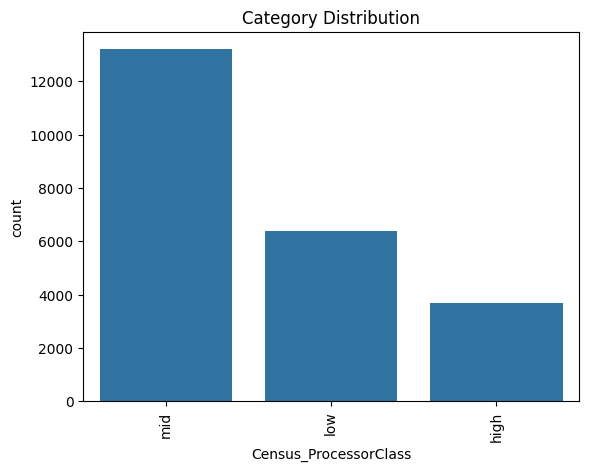

In [ ]:
print(final_df['Census_ProcessorClass'].value_counts())

order = final_df['Census_ProcessorClass'].value_counts().index
sns.countplot(data=final_df, x='Census_ProcessorClass',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['Census_ProcessorClass']].isnull().sum())

missing_ratio = final_df['Census_ProcessorClass'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

Census_ProcessorClass    5926856
dtype: int64
99.60899954807641 %


In [9]:
final_df['Census_ProcessorClass'] = final_df['Census_ProcessorClass'].fillna('Unknown')
detection_counts_by_class = (
    final_df
    .groupby('Census_ProcessorClass')['HasDetections']
    .value_counts()
    .unstack(fill_value=0)
)

detection_counts_by_class.columns = ['Count_0', 'Count_1']
detection_counts_by_class = detection_counts_by_class.reset_index()
print(detection_counts_by_class)

final_df.groupby('Census_ProcessorClass')['HasDetections'].mean().sort_values()

  Census_ProcessorClass  Count_0  Count_1
0               Unknown  4445977  1480879
1                  high     2461     1214
2                   low     4805     1591
3                   mid     9348     3846


,HasDetections
Census_ProcessorClass,
low,0.248749
Unknown,0.249859
mid,0.291496
high,0.330340


### EngineVersion

Description :  Defender state information e.g. 1.1.12603.0   ([Major].[Minor].[Build].[Revision])

###### Distribution

In [ ]:
final_df['EngineVersion'].value_counts()

,count
EngineVersion,
1.1.15200.1,2584675
1.1.15100.1,2322649
1.1.15000.2,204341
1.1.14901.4,169653
1.1.14600.4,113989
...,...
1.1.10401.0,2
1.1.13503.0,2
1.1.13301.0,2


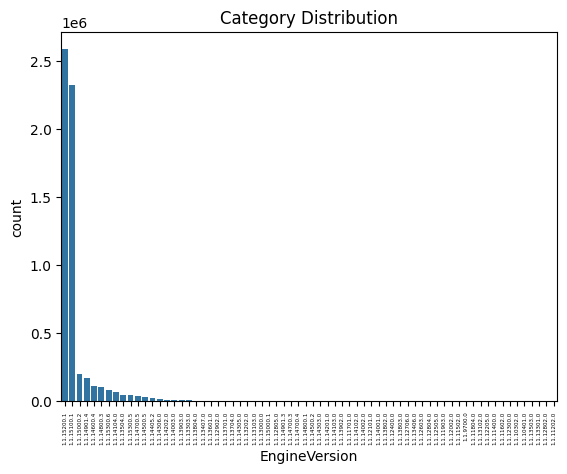

In [ ]:
order = final_df['EngineVersion'].value_counts().index
sns.countplot(data=final_df, x='EngineVersion',order=order)
plt.xticks(rotation=90,fontsize=4)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['EngineVersion']].isnull().sum())

missing_ratio = final_df['EngineVersion'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

EngineVersion    0
dtype: int64
0.0 %


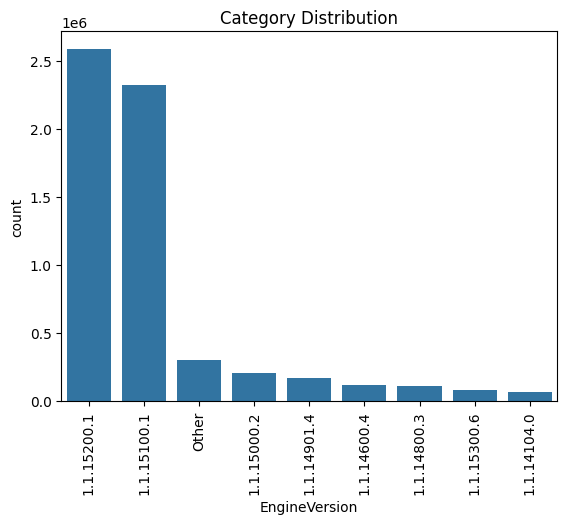

In [29]:
value_counts = (final_df['EngineVersion'].value_counts(normalize = True)*100)

others = value_counts[value_counts < 1].index.tolist()

final_df['EngineVersion'] = np.where(final_df['EngineVersion'].isin(others), 'Other',final_df['EngineVersion'])

order = final_df['EngineVersion'].value_counts().index
sns.countplot(data=final_df, x='EngineVersion',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### OsBuild

Description :  Build of the current operating system   

###### Distribution

OsBuild
17134    2557322
16299    1682164
15063     531322
14393     505460
10586     283610
          ...   
18226          1
18230          1
18244          1
18236          1
17750          1
Name: count, Length: 74, dtype: int64


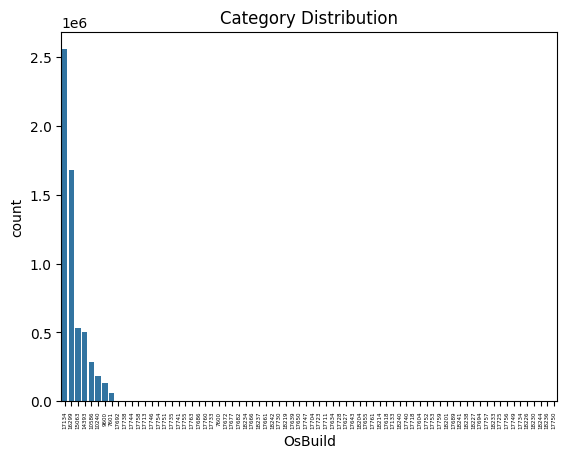

In [ ]:
print(final_df['OsBuild'].value_counts())

order = final_df['OsBuild'].value_counts().index
sns.countplot(data=final_df, x='OsBuild',order=order)
plt.xticks(rotation=90,fontsize=4)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['OsBuild']].isnull().sum())

missing_ratio = final_df['OsBuild'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

OsBuild    0
dtype: int64
0.0 %


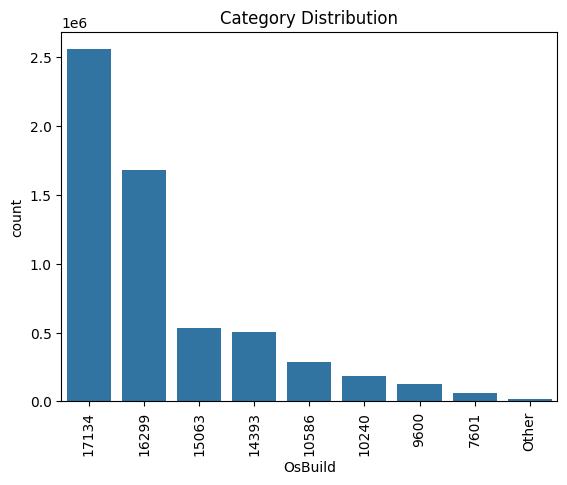

In [28]:
value_counts = (final_df['OsBuild'].value_counts(normalize = True)*100)

others = value_counts[value_counts < 1].index.tolist()

final_df['OsBuild'] = np.where(final_df['OsBuild'].isin(others), 'Other',final_df['OsBuild'])

order = final_df['OsBuild'].value_counts().index
sns.countplot(data=final_df, x='OsBuild',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### OsBuildLab

Description :   Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109 2022  

OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 2367390
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     821192
16299.15.amd64fre.rs3_release.170928-1534                 646181
15063.0.amd64fre.rs2_release.170317-1834                  484393
17134.1.x86fre.rs4_release.180410-1804                    189692
16299.15.x86fre.rs3_release.170928-1534                   176876
14393.2189.amd64fre.rs1_release.180329-1711               128727
10240.17443.amd64fre.th1.170602-2340                      114703
10586.1176.amd64fre.th2_release_sec.170913-1848           103188
15063.0.x86fre.rs2_release.170317-1834                     46929
14393.0.amd64fre.rs1_release.160715-1616                   38326
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800        35441
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033        33955
16299.637.amd64fre.rs3_release_svc.180808-1748             29520
14393.2189.x86fre.rs1_release.180329-1711                  29258
10586.1176.x86

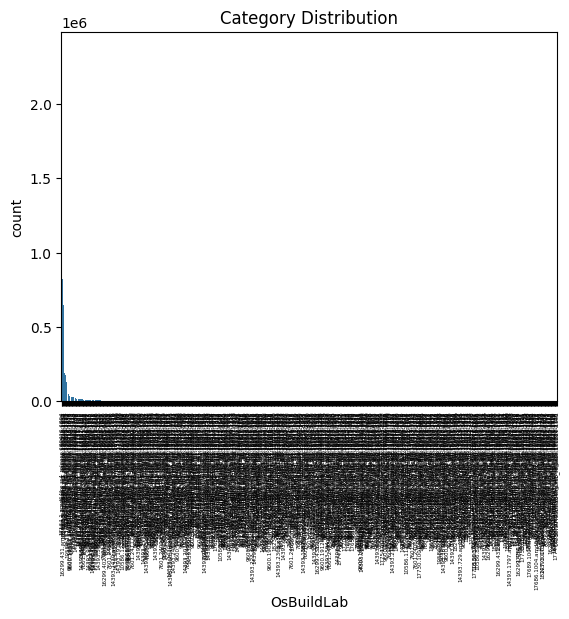

In [13]:
print(final_df['OsBuildLab'].value_counts().head(20))

order = final_df['OsBuildLab'].value_counts().index
sns.countplot(data=final_df, x='OsBuildLab',order=order)
plt.xticks(rotation=90,fontsize=4)
plt.title('Category Distribution')
plt.show()

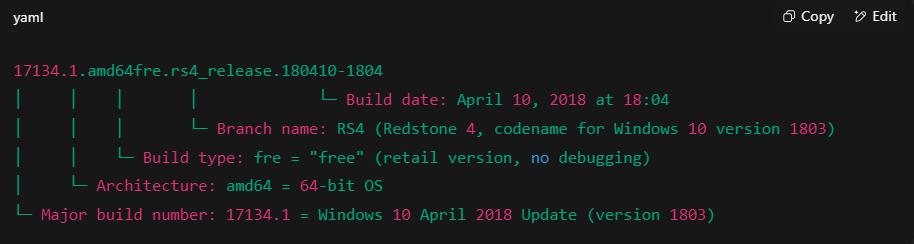

In [16]:
final_df['OsBuildLab'].value_counts()

,count
OsBuildLab,
17134.1.amd64fre.rs4_release.180410-1804,2367390
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908,821192
16299.15.amd64fre.rs3_release.170928-1534,646181
15063.0.amd64fre.rs2_release.170317-1834,484393
17134.1.x86fre.rs4_release.180410-1804,189692
...,...
7601.23338.amd64fre.win7sp1_ldr.160121-1716,1
16299.637.arm64fre.rs3_release_svc.180808-1748,1
17747.1000.amd64fre.rs5_release_sign.180822-1726,1


### OsPlatformSubRelease

Description :  Returns the OS Platform sub release (Windows Vista, Windows 7, Windows 8, TH1, TH2)  

###### Distribution

OsPlatformSubRelease
rs4           2557326
rs3           1682164
rs2            531322
rs1            505460
th2            283610
th1            182766
windows8.1     128828
windows7        63623
prers5          15022
Name: count, dtype: int64


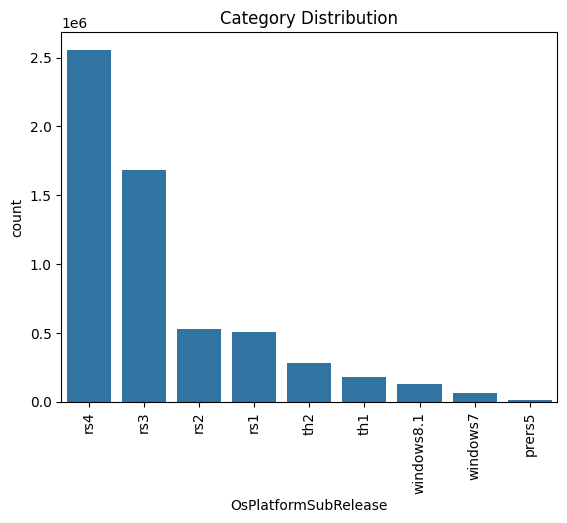

In [ ]:
print(final_df['OsPlatformSubRelease'].value_counts())

order = final_df['OsPlatformSubRelease'].value_counts().index
sns.countplot(data=final_df, x='OsPlatformSubRelease',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['OsPlatformSubRelease']].isnull().sum())

missing_ratio = final_df['OsPlatformSubRelease'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

OsPlatformSubRelease    0
dtype: int64
0.0 %


In [26]:
print(final_df['OsPlatformSubRelease'].value_counts(normalize = True)*100)

OsPlatformSubRelease
rs4           42.979395
rs3           28.271089
rs2            8.929600
rs1            8.494953
th2            4.766458
th1            3.071635
windows8.1     2.165132
windows7       1.069272
prers5         0.252465
Name: proportion, dtype: float64


### OsSuite

Description :  Product suite mask for the current operating system.   

###### Distribution

OsSuite
768    62.815748
256    36.996458
272     0.157946
400     0.010941
305     0.008151
16      0.007193
784     0.002420
274     0.000538
144     0.000387
49      0.000185
307     0.000034
Name: proportion, dtype: float64


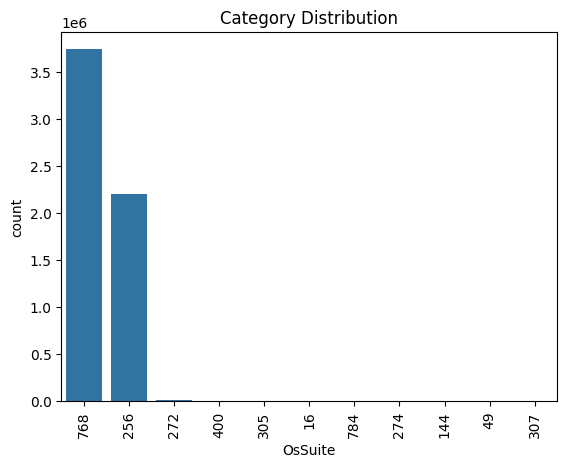

In [8]:
print(final_df['OsSuite'].value_counts(normalize = True)*100)

order = final_df['OsSuite'].value_counts().index
sns.countplot(data=final_df, x='OsSuite',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['OsSuite']].isnull().sum())

missing_ratio = final_df['OsSuite'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

OsSuite    0
dtype: int64
0.0 %


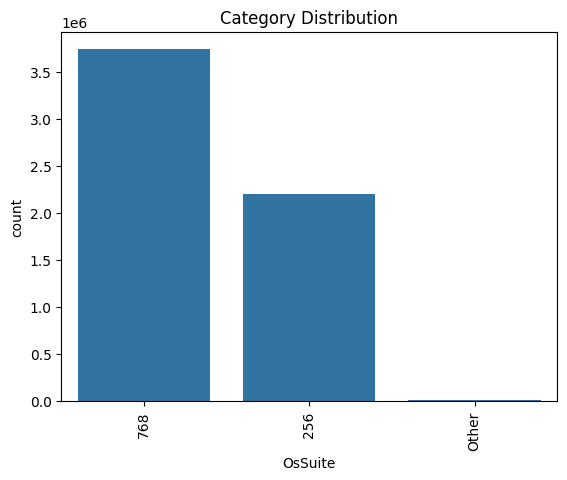

In [10]:
value_counts = final_df['OsSuite'].value_counts(normalize=True) * 100
others = value_counts[value_counts < 1].index.tolist()

final_df['OsSuite'] = np.where(final_df['OsSuite'].isin(others), 'Other',final_df['OsSuite'])

final_df['OsSuite'].value_counts()

order = final_df['OsSuite'].value_counts().index
sns.countplot(data=final_df, x='OsSuite',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### OsVer

Description : Version of the current operating system   

###### Distribution

OsVer
10.0.0.0        5757342
6.3.0.0          128790
6.1.1.0           63229
6.1.0.0             379
10.0.3.0            129
10.0.1.0             87
10.0.2.0             16
6.3.3.0              15
10.0.32.72           14
6.3.1.0              14
10.0.5.0             12
10.0.7.0             10
6.1.3.0              10
10.0.5.18             9
10.0.16.0             7
10.0.0.112            7
10.0.4.0              4
10.0.80.0             4
10.0.8.0              4
10.0.0.1              4
10.0.6.0              3
10.0.16.36            3
10.0.3.80             2
10.0.0.3              2
6.3.32.72             2
10.0.1.44             1
10.0.21.0             1
6.1.0.128             1
10.0.7.101            1
6.3.16.0              1
10.0.48.0             1
6.1.0.112             1
6.3.4.0               1
10.0.2.86             1
10.0.0.22             1
10.0.153.153          1
6.3.5.0               1
6.1.2.0               1
10.0.4.80             1
6.3.1.144             1
6.3.0.2               1
6.3.0.112 

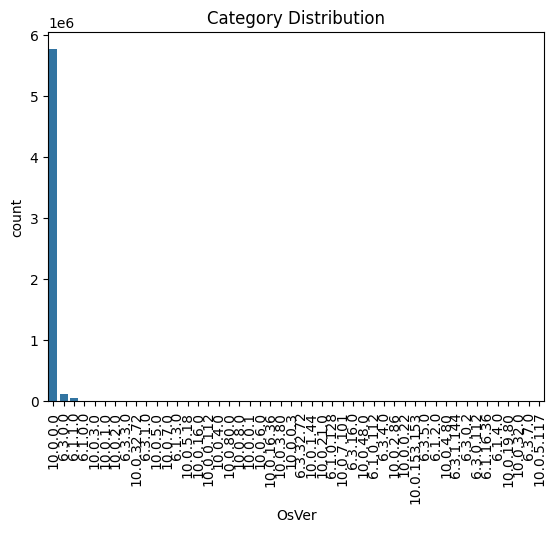

In [8]:
print(final_df['OsVer'].value_counts())

order = final_df['OsVer'].value_counts().index
sns.countplot(data=final_df, x='OsVer',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [ ]:
print(final_df[['OsVer']].isnull().sum())

missing_ratio = final_df['OsVer'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

OsVer    0
dtype: int64
0.0 %


### Platform

Description :  Calculates platform name (of OS related properties and processor property)   

###### Distribution

In [12]:
value_counts = final_df['Platform'].value_counts(normalize=True) * 100
print(value_counts)

Platform
windows10      96.580238
windows8        2.165132
windows7        1.069272
windows2016     0.185358
Name: proportion, dtype: float64


###### Missing Value

In [11]:
print(final_df[['Platform']].isnull().sum())

missing_ratio = final_df['Platform'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

Platform    0
dtype: int64
0.0 %


Platform
windows10      5746641
windows8        128828
windows7         63623
windows2016      11029
Name: count, dtype: int64


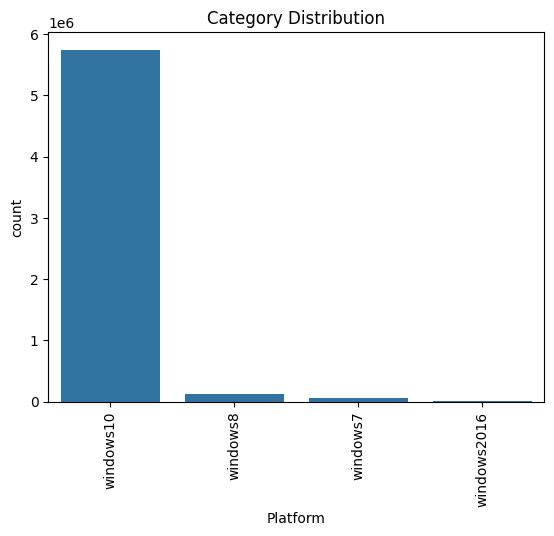

In [11]:
print(final_df['Platform'].value_counts())

order = final_df['Platform'].value_counts().index
sns.countplot(data=final_df, x='Platform',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### Processor

Description :  This is the process architecture of the installed operating system   

Processor
x64      5342641
x86       607137
arm64        343
Name: count, dtype: int64


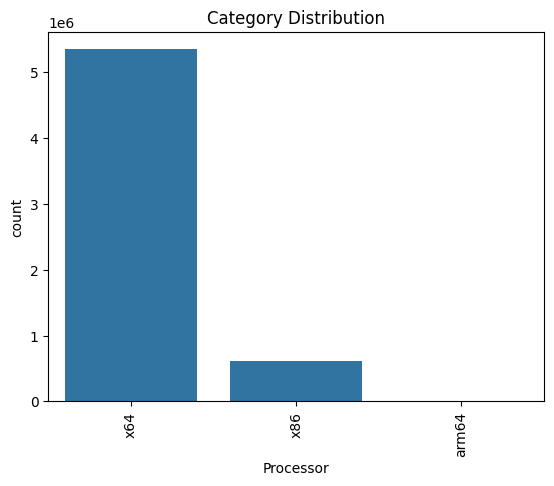

In [12]:
print(final_df['Processor'].value_counts())

order = final_df['Processor'].value_counts().index
sns.countplot(data=final_df, x='Processor',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

In [28]:
value_counts = final_df['Processor'].value_counts(normalize=True) * 100
print(value_counts)

Processor
x64      89.790460
x86      10.203776
arm64     0.005765
Name: proportion, dtype: float64


###### Missing Value

In [14]:
print(final_df[['Processor']].isnull().sum())

missing_ratio = final_df['Processor'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

Processor    0
dtype: int64
0.0 %


### ProductName

Description :   Defender state information e.g. win8defender   

ProductName
win8defender     5885637
mse                64423
mseprerelease         34
scep                  15
windowsintune          7
fep                    5
Name: count, dtype: int64


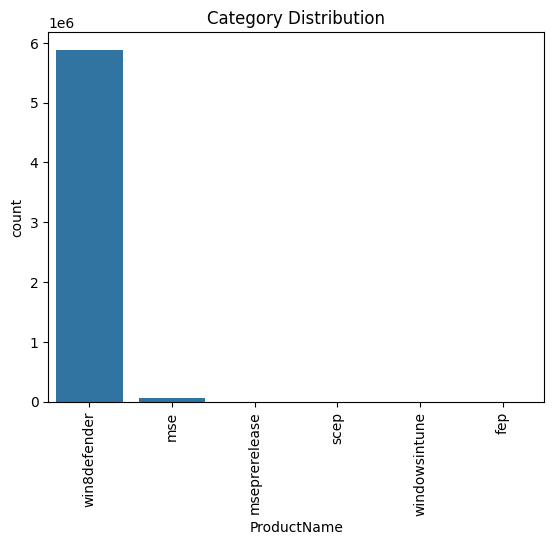

In [16]:
print(final_df['ProductName'].value_counts())

order = final_df['ProductName'].value_counts().index
sns.countplot(data=final_df, x='ProductName',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [17]:
print(final_df[['ProductName']].isnull().sum())

missing_ratio = final_df['ProductName'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

ProductName    0
dtype: int64
0.0 %


ProductName
win8defender    98.916257
mse              1.082717
Other            0.001025
Name: proportion, dtype: float64


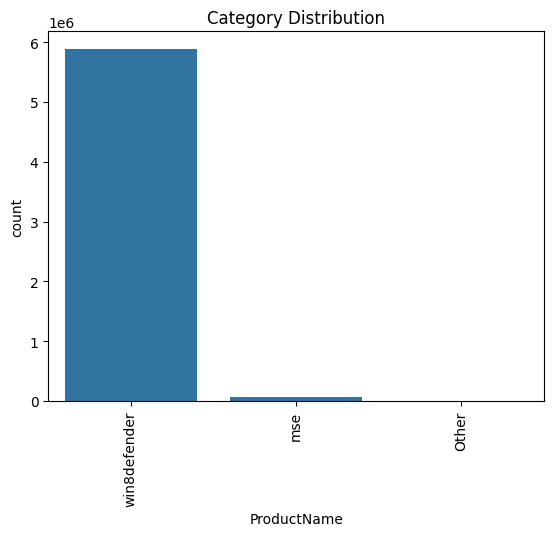

In [31]:
value_counts = final_df['ProductName'].value_counts(normalize=True) * 100
print(value_counts)
others = value_counts[value_counts < 1].index.tolist()

final_df['ProductName'] = np.where(final_df['ProductName'].isin(others), 'Other',final_df['ProductName'])

final_df['ProductName'].value_counts()

order = final_df['ProductName'].value_counts().index
sns.countplot(data=final_df, x='ProductName',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### RtpStateBitfield

Description :  Realtime protection state

RtpStateBitfield
7.0     5751817
0.0      142869
5.0       18316
8.0       10982
3.0        2424
1.0        1179
35.0          9
Name: count, dtype: int64


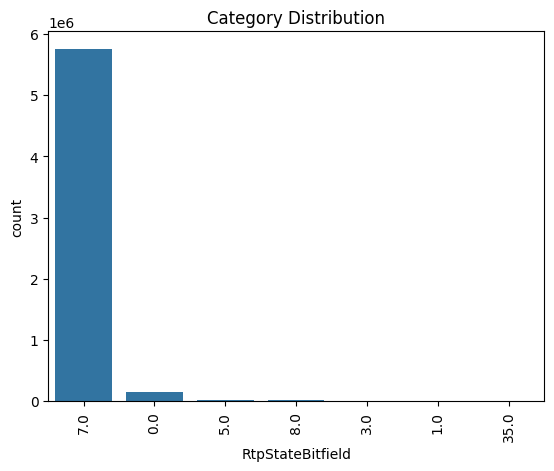

In [18]:
print(final_df['RtpStateBitfield'].value_counts())

order = final_df['RtpStateBitfield'].value_counts().index
sns.countplot(data=final_df, x='RtpStateBitfield',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

###### Missing Value

In [19]:
print(final_df[['RtpStateBitfield']].isnull().sum())

missing_ratio = final_df['RtpStateBitfield'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

RtpStateBitfield    22525
dtype: int64
0.378563730048515 %


RtpStateBitfield
7.0     97.034565
0.0      2.410235
5.0      0.308995
8.0      0.185269
3.0      0.040893
1.0      0.019890
35.0     0.000152
Name: proportion, dtype: float64


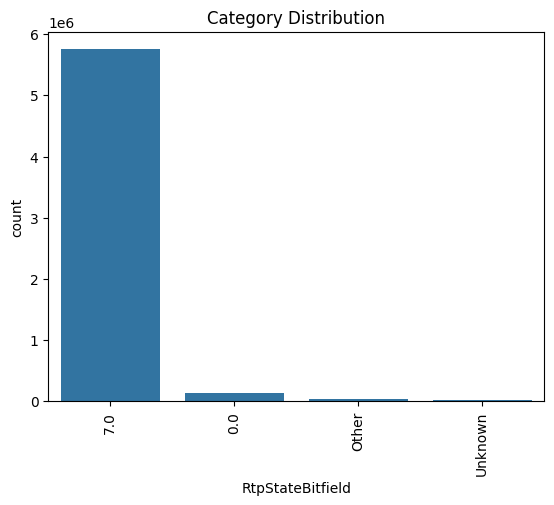

In [13]:
value_counts = final_df['RtpStateBitfield'].value_counts(normalize=True) * 100
print(value_counts)
others = value_counts[value_counts < 1].index.tolist()

final_df['RtpStateBitfield'] = final_df['RtpStateBitfield'].fillna('Unknown')
final_df['RtpStateBitfield'] = np.where(final_df['RtpStateBitfield'].isin(others), 'Other',final_df['RtpStateBitfield'])

order = final_df['RtpStateBitfield'].value_counts().index
sns.countplot(data=final_df, x='RtpStateBitfield',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### SkuEdition

Description :  The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU Edition' is a string value that is in one of three classes of results. The design must hand each class.

SkuEdition
Home               3705238
Pro                2121504
Invalid              53842
Education            26375
Enterprise           22566
Enterprise LTSB      13544
Cloud                 4133
Server                2919
Name: count, dtype: int64


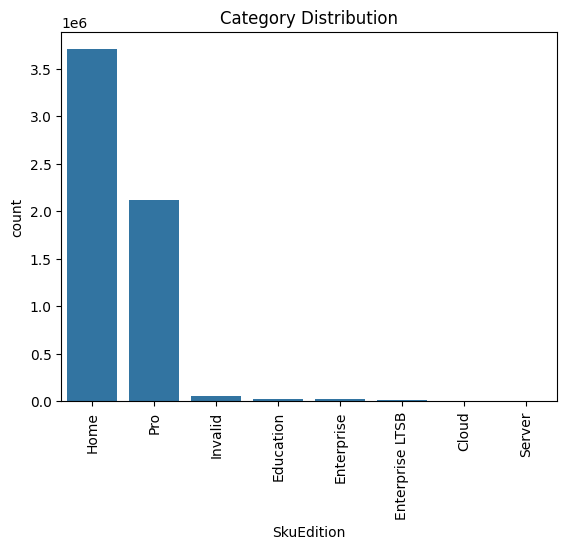

In [20]:
print(final_df['SkuEdition'].value_counts())

order = final_df['SkuEdition'].value_counts().index
sns.countplot(data=final_df, x='SkuEdition',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

In [23]:
print(final_df[['SkuEdition']].isnull().sum())

missing_ratio = final_df['SkuEdition'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

SkuEdition    0
dtype: int64
0.0 %


SkuEdition
Home               62.271641
Pro                35.654804
Invalid             0.904889
Education           0.443268
Enterprise          0.379253
Enterprise LTSB     0.227626
Cloud               0.069461
Server              0.049058
Name: proportion, dtype: float64


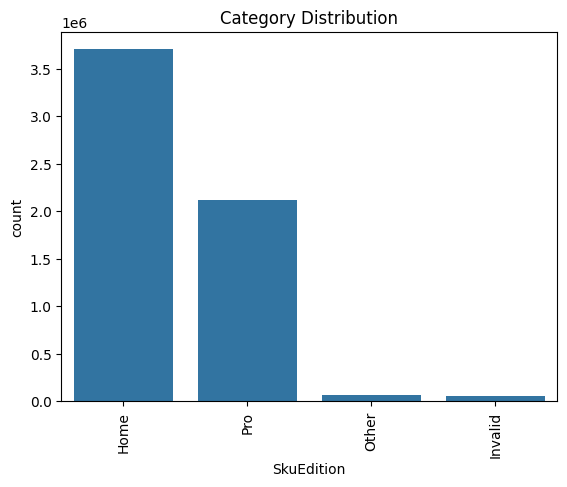

In [9]:
value_counts = final_df['SkuEdition'].value_counts(normalize=True) * 100
print(value_counts)

others = value_counts[(value_counts < 1) & (value_counts.index != 'Invalid')].index.tolist()

final_df['SkuEdition'] = final_df['SkuEdition'].fillna('Unknown')
final_df['SkuEdition'] = np.where(final_df['SkuEdition'].isin(others), 'Other',final_df['SkuEdition'])

order = final_df['SkuEdition'].value_counts().index
sns.countplot(data=final_df, x='SkuEdition',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### SmartScreen

Description :  This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.   

SmartScreen
RequireAdmin    3057799
ExistsNotSet     483028
Off              125361
Warn              83617
Prompt            23646
Block             14711
off                 806
On                  443
&#x02;              263
&#x01;              207
on                   97
requireadmin          4
0                     3
OFF                   2
Promt                 2
Enabled               1
prompt                1
warn                  1
requireAdmin          1
Name: count, dtype: int64


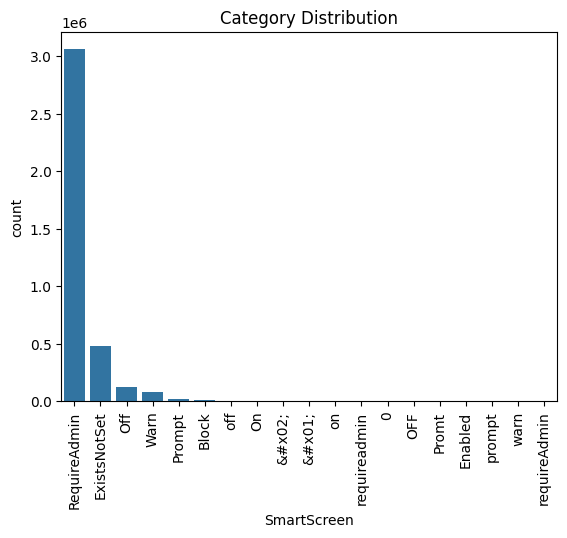

In [21]:
print(final_df['SmartScreen'].value_counts())

order = final_df['SmartScreen'].value_counts().index
sns.countplot(data=final_df, x='SmartScreen',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

In [24]:
print(final_df[['SmartScreen']].isnull().sum())

missing_ratio = final_df['SmartScreen'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

SmartScreen    2160128
dtype: int64
36.303933987224795 %


SmartScreen
requireadmin    51.390619
unknown         36.303934
existsnotset     8.117953
off              2.120444
warn             1.405316
prompt           0.397420
block            0.247239
on               0.009075
&#x02;           0.004420
&#x01;           0.003479
0                0.000050
promt            0.000034
enabled          0.000017
Name: proportion, dtype: float64


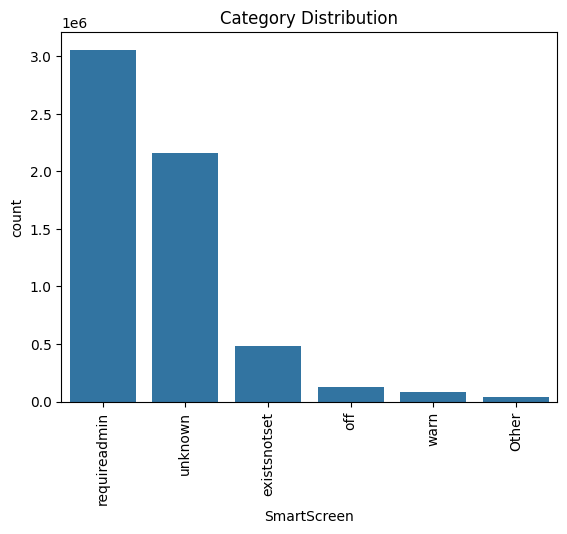

In [12]:
final_df['SmartScreen'] = final_df['SmartScreen'].str.lower()
final_df['SmartScreen'] = final_df['SmartScreen'].fillna('unknown')

value_counts = final_df['SmartScreen'].value_counts(normalize=True) * 100
print(value_counts)

others = value_counts[value_counts < 1].index.tolist()

final_df['SmartScreen'] = np.where(final_df['SmartScreen'].isin(others), 'Other',final_df['SmartScreen'])
order = final_df['SmartScreen'].value_counts().index
sns.countplot(data=final_df, x='SmartScreen',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

### UacLuaenable

Description :  This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.   

UacLuaenable
1.0           5907140
0.0             35952
48.0              129
2.0                24
49.0               16
6357062.0           8
3.0                 5
16777216.0          1
7798884.0           1
Name: count, dtype: int64


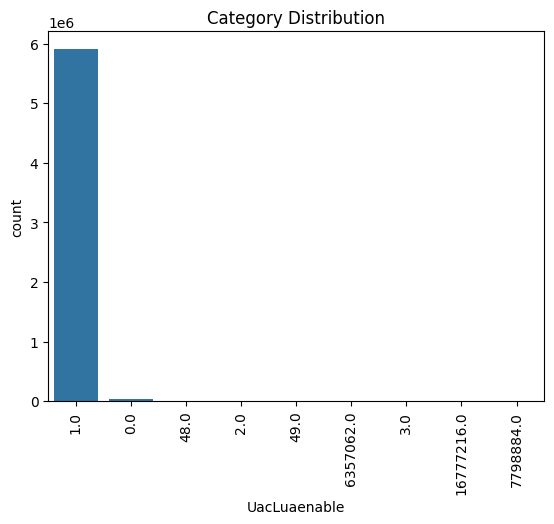

In [25]:
print(final_df['UacLuaenable'].value_counts())

order = final_df['UacLuaenable'].value_counts().index
sns.countplot(data=final_df, x='UacLuaenable',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

In [26]:
print(final_df[['UacLuaenable']].isnull().sum())

missing_ratio = final_df['UacLuaenable'].isnull().sum() / len(final_df) *100
print(missing_ratio,'%')

UacLuaenable    6845
dtype: int64
0.11503967734437669 %


UacLuaenable
1.0           99.391985
0.0            0.604919
48.0           0.002171
2.0            0.000404
49.0           0.000269
6357062.0      0.000135
3.0            0.000084
16777216.0     0.000017
7798884.0      0.000017
Name: proportion, dtype: float64


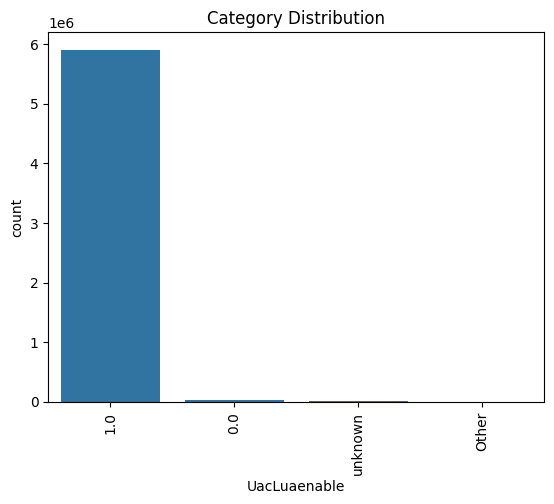

In [25]:
value_counts = final_df['UacLuaenable'].value_counts(normalize=True) * 100
print(value_counts)

others = value_counts[(value_counts < 1) & (value_counts.index != 0.0)].index.tolist()

final_df['UacLuaenable'] = final_df['UacLuaenable'].fillna('unknown')
final_df['UacLuaenable'] = np.where(final_df['UacLuaenable'].isin(others), 'Other',final_df['UacLuaenable'])

order = final_df['UacLuaenable'].value_counts().index
sns.countplot(data=final_df, x='UacLuaenable',order=order)
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()